# Time Based Phase Shift

Starting UDP packet capture...
Received UDP packet at 1714631872.1906126
Received UDP packet at 1714631875.710317
Received UDP packet at 1714631878.72163
Received UDP packet at 1714631882.2353299
Received UDP packet at 1714631885.2405622
Received UDP packet at 1714631888.7591074
Received UDP packet at 1714631891.7713463
Received UDP packet at 1714631895.2870429
Received UDP packet at 1714631898.301287
Received UDP packet at 1714631901.810531
Received UDP packet at 1714631904.8167665
Received UDP packet at 1714631908.3354697
Received UDP packet at 1714631911.3462558
Received UDP packet at 1714631914.8554661
Received UDP packet at 1714631917.871711
Received UDP packet at 1714631921.3904822


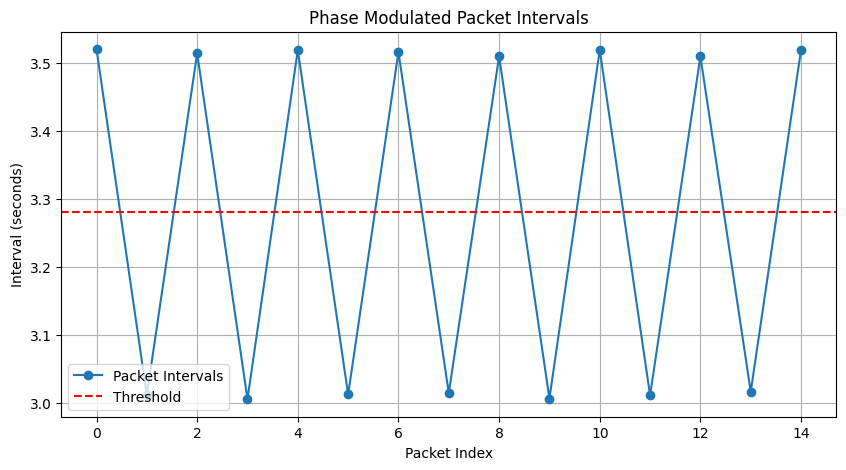

Decoded binary data: 101010101010101


In [5]:
from scapy.all import sniff, IP, UDP
import matplotlib.pyplot as plt
import numpy as np
import time

timestamps = []  # Global list to store packet timestamps

def handle_packet(packet):
    """ Handle each packet, log its arrival time. """
    if packet.haslayer(UDP):
        current_time = time.time()
        timestamps.append(current_time)
        print(f"Received UDP packet at {current_time}")

def plot_and_decode_intervals(timestamps):
    """ Plot packet arrival intervals and decode them into binary data. """
    intervals = np.diff(timestamps)  # Calculate intervals between packet receptions
    threshold = np.mean(intervals)  # Define threshold to distinguish binary '0' and '1'
    binary_data = ''.join(['0' if interval < threshold else '1' for interval in intervals])

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(intervals, 'o-', label='Packet Intervals')
    plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
    plt.title('Phase Modulated Packet Intervals')
    plt.xlabel('Packet Index')
    plt.ylabel('Interval (seconds)')
    plt.grid(True)
    plt.legend()
    plt.show()

    print(f"Decoded binary data: {binary_data}")

def main():
    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter="udp port 12345", prn=handle_packet, store=False, count=16)  # Adjust timeout as necessary

    # After capture, process and plot
    if len(timestamps) > 1:
        plot_and_decode_intervals(timestamps)

if __name__ == "__main__":
    main()

## Receive Phase Modulation by Port Number

Starting UDP packet capture...
Received UDP packet on port 12345 at time 1714632508.377528
Received UDP packet on port 12346 at time 1714632511.387647
Received UDP packet on port 12345 at time 1714632514.397266
Received UDP packet on port 12346 at time 1714632517.409509
Received UDP packet on port 12345 at time 1714632520.428762
Received UDP packet on port 12346 at time 1714632523.440945
Received UDP packet on port 12345 at time 1714632526.452324
Received UDP packet on port 12346 at time 1714632529.471091
Received UDP packet on port 12345 at time 1714632532.482933
Received UDP packet on port 12346 at time 1714632535.497365
Received UDP packet on port 12345 at time 1714632538.50464
Received UDP packet on port 12346 at time 1714632541.516587
Received UDP packet on port 12345 at time 1714632544.522099
Received UDP packet on port 12346 at time 1714632547.541262
Received UDP packet on port 12345 at time 1714632550.549394
Received UDP packet on port 12346 at time 1714632553.561415
Decoded bi

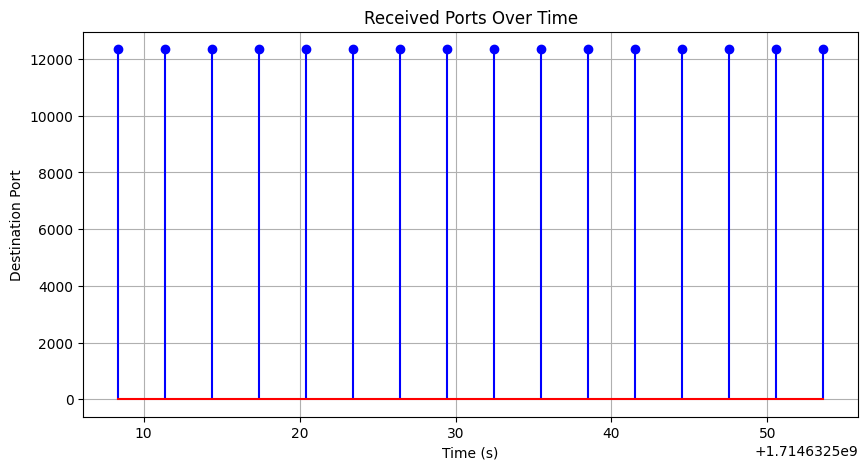

In [11]:
from scapy.all import sniff, IP, UDP
import matplotlib.pyplot as plt
import numpy as np

# Global lists to store packet data
timestamps = []
ports = []

def handle_packet(packet):
    """ Handle each packet, logging the timestamp and destination port. """
    if packet.haslayer(UDP):
        current_time = packet.time  # Capture the timestamp of the packet
        dest_port = packet[UDP].dport  # Capture the destination port of the packet
        timestamps.append(current_time)
        ports.append(dest_port)
        print(f"Received UDP packet on port {dest_port} at time {current_time}")

def plot_and_decode_ports(ports):
    """ Plot the sequence of received ports and decode them into binary data. """
    # Assume the base port is the smallest port received
    base_port = min(ports)
    binary_data = ['0' if port == base_port else '1' for port in ports]

    # Converting list of binary strings into a single binary string
    binary_data = ''.join(binary_data)
    print(f"Decoded binary data: {binary_data}")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.stem(timestamps, ports, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.title('Received Ports Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Destination Port')
    plt.grid(True)
    plt.show()

def main():
    # Start packet sniffing
    print("Starting UDP packet capture...")
    sniff(filter="udp and portrange 12345-12350", prn=handle_packet, store=False, count=16)  # Adjust timeout as necessary

    # After capture, plot and decode
    if ports:
        plot_and_decode_ports(ports)

if __name__ == "__main__":
    main()